In [10]:
import sympy as sp

# t, x, y, z, vs, sigma, R = sp.symbols('t x y z v_s sigma R')
vs, sigma, R = sp.symbols('v_s sigma R')

lam = sp.symbols('lambda')

t = sp.Function('t')(lam)
x = sp.Function('x')(lam)
y = sp.Function('y')(lam)
z = sp.Function('z')(lam)


xs = vs * t  # since it's steady state
r = sp.sqrt((x - xs)**2 + y**2 + z**2)
f_r = (sp.tanh(sigma * (r + R)) - sp.tanh(sigma * (r - R))) / (2 * sp.tanh(sigma * R))

#metric components based on the line element 
g_tt = -(1 - vs**2 * f_r**2)
g_tx = g_xt = vs * f_r
g_xx = g_yy = g_zz = 1

#g_uv
metric = sp.Matrix([[g_tt, g_tx, 0, 0],
                    [g_xt, g_xx, 0, 0],
                    [0, 0, g_yy, 0],
                    [0, 0, 0, g_zz]])

# The inverse metric tensor g^uv (needed for Christoffel symbols)
metric_inv = metric.inv()

# defining a partial
def partial_derivative(matrix, var):
    """ This function returns the matrix of partial derivatives """
    return sp.Matrix(matrix.shape[0], matrix.shape[1], lambda i,j: sp.diff(matrix[i, j], var))

# derivatives of metric tensor
partial_t = partial_derivative(metric, t)
partial_x = partial_derivative(metric, x)
partial_y = partial_derivative(metric, y)
partial_z = partial_derivative(metric, z)

print("start computation")
# computing the symbols using the metric equation
christoffel_symbols = [[[0 for i in range(4)] for j in range(4)] for k in range(4)]
for lambda_ in range(4):
    for mu in range(4):
        for nu in range(4):
            christoffel_symbols[lambda_][mu][nu] = 1/2 * (
                metric_inv[lambda_, 0] * (partial_x[mu, nu] + partial_x[nu, mu] - partial_t[mu, nu]) +
                metric_inv[lambda_, 1] * (partial_t[mu, nu] + partial_t[nu, mu] - partial_x[mu, nu]) +
                metric_inv[lambda_, 2] * (partial_y[mu, nu] + partial_y[nu, mu] - partial_y[mu, nu]) +
                metric_inv[lambda_, 3] * (partial_z[mu, nu] + partial_z[nu, mu] - partial_z[mu, nu])
            ).simplify()
            print(f"l: {lambda_} mu: {mu} nu{nu}")
            print(christoffel_symbols[lambda_][mu][nu])

christoffel_symbols[0][1][0]  # Displaying Γ^t_{tx} as an example

start computation
l: 0 mu: 0 nu0
0.125*sigma*v_s**2*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))))**2 + 2*(v_s + 2)*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))*tanh(R*sigma))*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2 - tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)/(sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)*tanh(R*sigma)**3)
l: 0 mu: 0 nu1
0.125*sigma*v_s*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))

0.125*sigma*v_s*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))) + 2*(v_s + 2)*tanh(R*sigma))*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2 - tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)/(sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)*tanh(R*sigma)**2)

In [11]:
C = christoffel_symbols

In [12]:
C[0][0][1]

0.125*sigma*v_s*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))) + 2*(v_s + 2)*tanh(R*sigma))*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2 - tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)/(sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)*tanh(R*sigma)**2)

In [13]:
C[0][1][0]

0.125*sigma*v_s*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))) + 2*(v_s + 2)*tanh(R*sigma))*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2 - tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)/(sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)*tanh(R*sigma)**2)

Definitions of momenta using trajectory of photon:

$$
\frac{dt}{d\lambda}-p^t=0
$$
$$
\frac{dx}{d\lambda}-p^x=0
$$
$$
\frac{dy}{d\lambda}-p^y=0
$$

In [14]:
pt = sp.diff(t, lam)
px = sp.diff(x, lam)
py = sp.diff(y, lam)


pt

Derivative(t(lambda), lambda)

$$
\frac{dp^t}{d\lambda}+\Gamma^t_{tt}(p^t)^2+\Gamma^t_{xx}(p^x)^2+2\Gamma^t_{tx}p^tp^x+2\Gamma^t_{ty}p^tp^y+2\Gamma^t_{xy}p^xp^y=0
$$
$$
\frac{dp^x}{d\lambda}+\Gamma^x_{tt}(p^t)^2+\Gamma^x_{xx}(p^x)^2+2\Gamma^x_{tx}p^tp^x+2\Gamma^x_{ty}p^tp^y+2\Gamma^x_{xy}p^xp^y=0
$$
$$
\frac{dp^y}{d\lambda}+\Gamma^y_{tt}(p^t)^2+2\Gamma^y_{tx}p^tp^x=0
$$

[0, 1, 2, 3]=[t,x,y,z]

In [15]:
Ct, Cx, Cy =C[0], C[1], C[2]
dptdl=-1*(Ct[0][0]*pt**2+Ct[1][1]*px**2+2*Ct[0][1]*pt*px+2*Ct[0][2]*pt*py+2*Ct[1][2]*px*py)
dpxdl=-1*(Cx[0][0]*pt**2+Cx[1][1]*px**2+2*Cx[0][1]*pt*px+2*Cx[0][2]*pt*py+2*Cx[1][2]*px*py)
dpydl=-1*(Cy[0][0]*pt**2+2*Cy[0][1]*pt*px)

In [16]:
dptdl,dpxdl,dpydl

(-0.125*sigma*v_s**2*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))))**2 + 2*(v_s + 2)*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))*tanh(R*sigma))*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2 - tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*Derivative(t(lambda), lambda)**2/(sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)*tanh(R*sigma)**3) - 0.25*sigma*v_s*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigm

In [17]:
print(dpxdl)

0.0625*sigma*v_s**2*(v_s*t(lambda) - x(lambda))*(2*v_s*(v_s + 2)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))))*tanh(R*sigma) + (2*v_s + 1)*(v_s**2*tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))**2 + 2*v_s**2*tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))*tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + v_s**2*tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))**2 - 4*tanh(R*sigma)**2))*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(

## Recursive system

In [50]:
dt = sp.diff(t, lam)
dx = sp.diff(x, lam)
dy = sp.diff(y, lam)
dz = sp.diff(z, lam)

v_s, sigma, R = sp.symbols('v_s sigma R')

# define constants
theta_0=np.pi/3
sigma_val = 1
vs_val=3
R_val=2

def evaluate(eq, POS, VEL):
    [t_val, x_val, y_val]=POS
    [dt_val, dx_val, dy_val]=VEL
    substitutions = {
        t: t_val,
        x: x_val,
        y: y_val,
        z: 0,
        dt: dt_val,
        dx: dx_val,
        dy: dy_val,
        dz: 0, 
        sigma: sigma_val,
        v_s: vs_val,
        R: R_val
    }
    
    # Perform substitutions
    result = eq.subs(substitutions)
    result = result.evalf()
    return result

In [60]:
import numpy as np
# dLambda
dL=0.1

# define initial conditions

L=0
pos=[1, 0, 0] #[t, x, y]
vel=[1, np.cos(theta_0)+vs_val, np.sin(theta_0)] #[t',x',y']
acc=[0, 0, 0] #[t'',x'',y'']

geod = {
    L: [pos, vel, acc]
}

# set up recursion

for i in range(30):
    L_=L
    L+=dL
    dp=[
        evaluate(dptdl, pos, vel),
        evaluate(dpxdl, pos, vel),
        evaluate(dpydl, pos, vel)
    ]
    p=[
        geod[L_][1][0]+dp[0]*dL,
        geod[L_][1][1]+dp[1]*dL,
        geod[L_][1][2]+dp[2]*dL
    ]
    a=[
        geod[L_][0][0]+p[0]*dL,
        geod[L_][0][1]+p[1]*dL,
        geod[L_][0][2]+p[2]*dL
    ]
    geod[L]=[a,p,dp]

In [57]:
geod

{0: [[1, 0, 0], [1, 3.5, 0.8660254037844386], [0, 0, 0]],
 0.1: [[1.29204609707501, 0.455772230311428, 0.0866025403784439],
  [2.92046097075011, 4.55772230311428, 0.866025403784439],
  [19.2046097075011, 10.5772230311428, 0]],
 0.2: [[1.77613829122503, 1.01731669093428, 0.173205080756888],
  [4.84092194150021, 5.61544460622856, 0.866025403784439],
  [19.2046097075011, 10.5772230311428, 0]],
 0.30000000000000004: [[2.45227658245006, 1.68463338186857, 0.259807621135332],
  [6.76138291225032, 6.67316690934285, 0.866025403784439],
  [19.2046097075011, 10.5772230311428, 0]],
 0.4: [[3.32046097075011, 2.45772230311428, 0.346410161513775],
  [8.68184388300042, 7.73088921245713, 0.866025403784439],
  [19.2046097075011, 10.5772230311428, 0]],
 0.5: [[4.38069145612516, 3.33658345467142, 0.433012701892219],
  [10.6023048537505, 8.78861151557141, 0.866025403784439],
  [19.2046097075011, 10.5772230311428, 0]],
 0.6: [[5.63296803857522, 4.32121683653999, 0.519615242270663],
  [12.5227658245006, 9.84

## Plotting

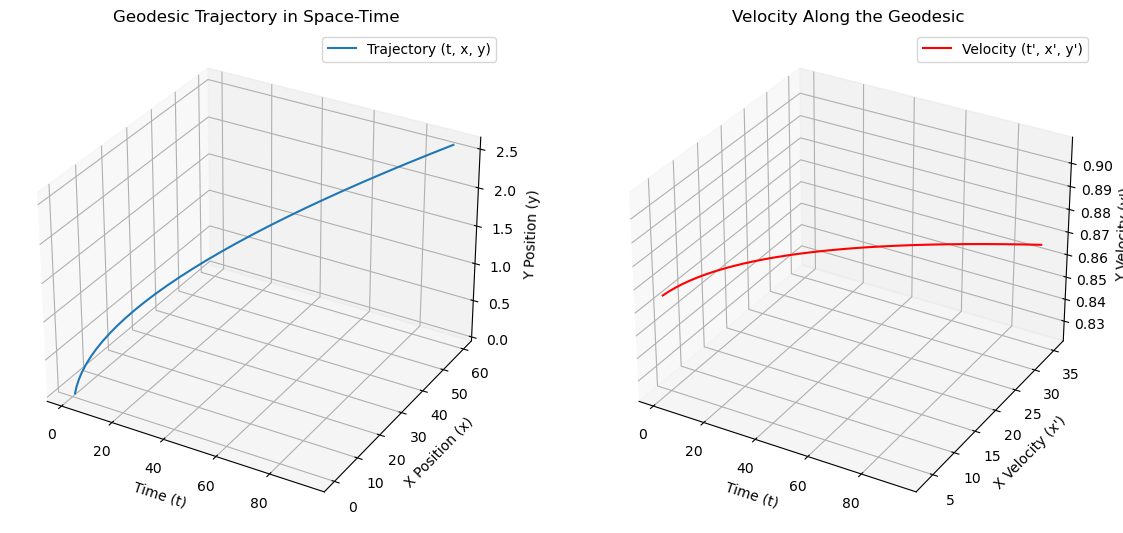

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

times = [key for key in geod.keys()]
positions = [geod[key][0] for key in geod.keys()]
velocities = [geod[key][1] for key in geod.keys()]

# Unpacking positions and velocities
ts, xs, ys = zip(*positions)
tps, xps, yps = zip(*velocities)

# Plotting
fig = plt.figure(figsize=(14, 7))

# Plot for position
ax = fig.add_subplot(121, projection='3d')
ax.plot(ts, xs, ys, label='Trajectory (t, x, y)')
ax.set_xlabel('Time (t)')
ax.set_ylabel('X Position (x)')
ax.set_zlabel('Y Position (y)')
ax.set_title('Geodesic Trajectory in Space-Time')
ax.legend()

# Plot for velocity
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(ts, xps, yps, label="Velocity (t', x', y')", color='r')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel("X Velocity (x')")
ax2.set_zlabel("Y Velocity (y')")
ax2.set_title("Velocity Along the Geodesic")
ax2.legend()

plt.show()